Data: https://dacon.io/competitions/official/236230

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. 데이터

### 1-1. 데이터 호출

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/data_0325/train.csv")
test = pd.read_csv("/content/drive/MyDrive/data_0325/test.csv")

### 1-2. 데이터 전처리

#### 1-2-a. 결측치 확인 및 제거

In [ ]:
def preprocess(df):
    df.drop("ID",axis=1,inplace=True)
    return df

In [ ]:
train.drop("ID",axis=1,inplace=True)

In [ ]:
train.isnull().sum()

Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [ ]:
test.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [ ]:
test[test["Household_Status"].isnull()]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
2659,TEST_2659,20,F,College,Children or Armed Forces,0,Not in universe or children,Unknown,Black,All other,...,Other relative of householder,Native,US,US,US,Nonfiler,0,0,0,Under Median


In [ ]:
display(train.dtypes)

Age                        int64
Gender                    object
Education_Status          object
Employment_Status         object
Working_Week (Yearly)      int64
Industry_Status           object
Occupation_Status         object
Race                      object
Hispanic_Origin           object
Martial_Status            object
Household_Status          object
Household_Summary         object
Citizenship               object
Birth_Country             object
Birth_Country (Father)    object
Birth_Country (Mother)    object
Tax_Status                object
Gains                      int64
Losses                     int64
Dividends                  int64
Income_Status             object
Income                     int64
dtype: object

In [ ]:
test["Household_Status"].fillna(train["Household_Status"].mode()[0],inplace=True)

#### 1-2-b. 수치 이상치 확인

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

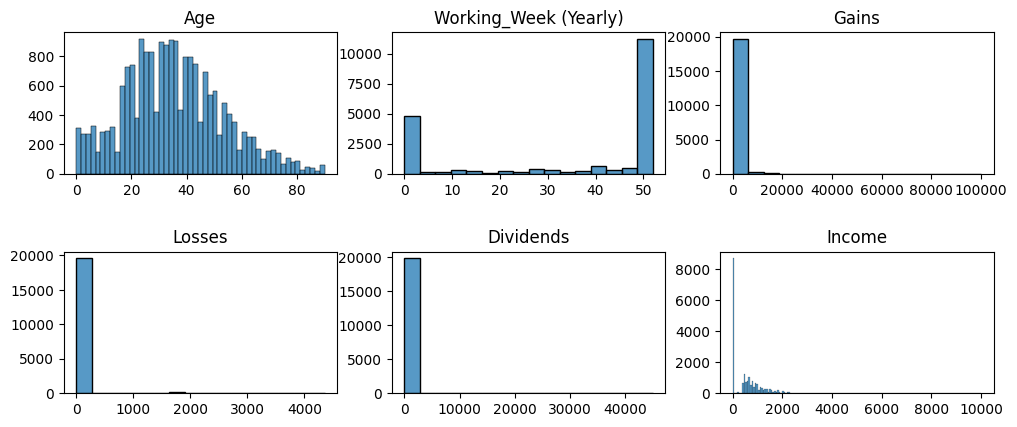

In [ ]:
col = ['Age','Working_Week (Yearly)','Gains','Losses','Dividends','Income']

plt.figure(figsize=(12,10))

for i in range(len(col)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.55)
    plt.title(col[i])
    sns.histplot(train[col[i]])
    plt.title(col[i])
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

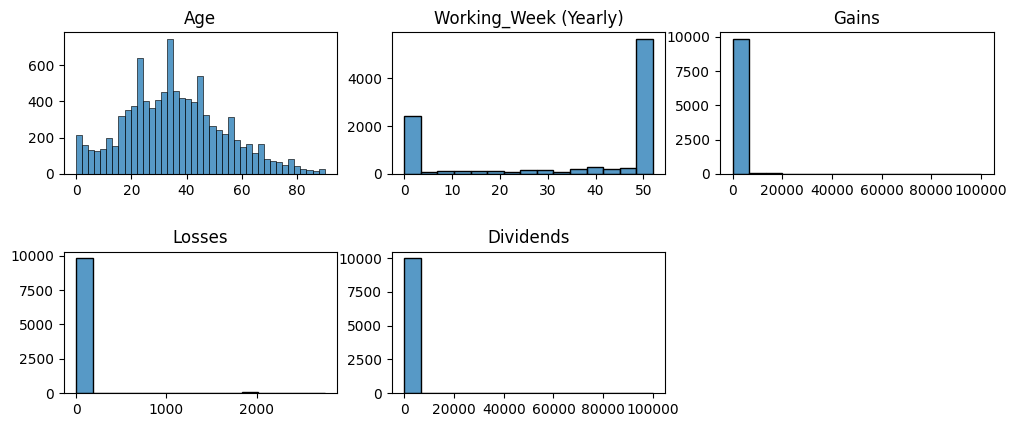

In [ ]:
test_col = ['Age','Working_Week (Yearly)','Gains','Losses','Dividends']

plt.figure(figsize=(12,10))

for i in range(len(test_col)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.55)
    plt.title(test_col[i])
    sns.histplot(test[test_col[i]])
    plt.title(test_col[i])
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

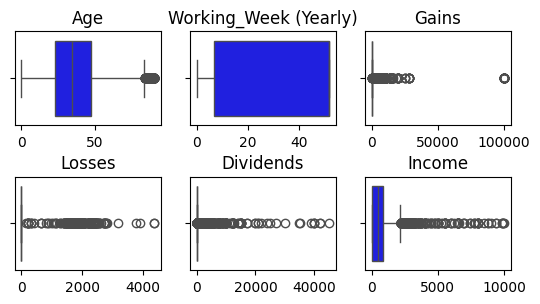

In [ ]:
for i in range(len(col)):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.55)
    plt.title(col[i])
    sns.boxplot(x=train[col[i]], color='blue')
    plt.title(col[i])
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

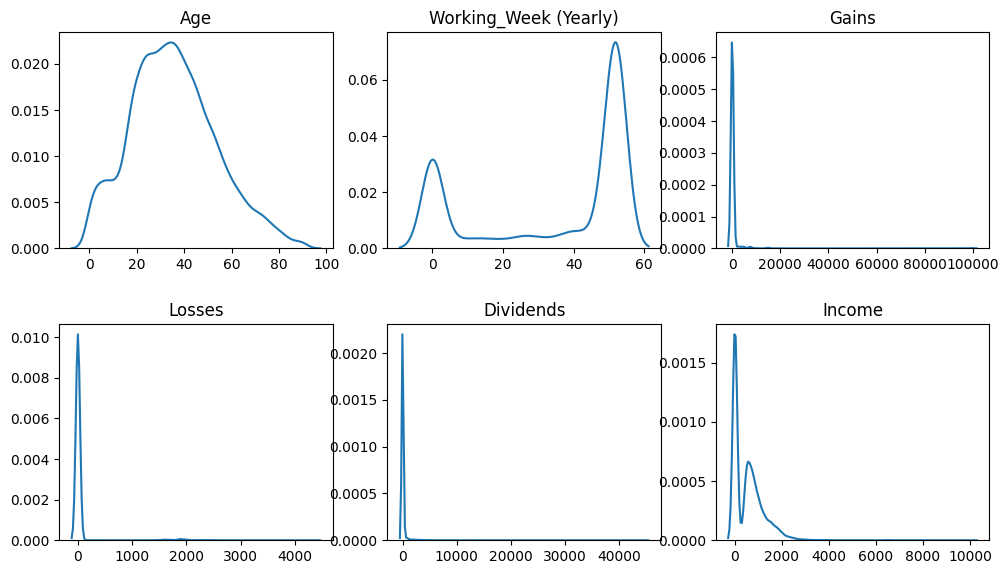

In [ ]:
plt.figure(figsize=(12, 10))

for i in range(len(col)):
    plt.subplot(3, 3, i+1, )
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.title(col[i])
    sns.kdeplot(train[col[i]])
    plt.title(col[i])
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

In [ ]:
train['Age'].value_counts()

37    476
35    475
24    473
33    467
31    466
     ... 
84     20
85     16
87     11
89     10
88      9
Name: Age, Length: 91, dtype: int64

In [ ]:
train['Working_Week (Yearly)'].value_counts()

52    10613
0      4720
40      440
50      363
48      313
26      283
20      213
12      209
30      207
36      181
32      139
44      138
16      134
51      134
8       129
49      117
35      115
24      105
46       97
45       95
42       94
39       87
28       79
4        78
10       67
25       63
43       58
38       57
6        55
13       54
15       48
18       46
22       45
47       43
2        41
1        34
14       34
5        32
3        32
17       30
7        28
34       23
9        23
37       20
19       13
41       13
27       12
11       10
21        9
29        8
23        8
31        6
33        5
Name: Working_Week (Yearly), dtype: int64

#### 1-2-c. 정성 데이터 이상치 확인

In [ ]:
train['Gender'].value_counts()

F    10472
M     9528
Name: Gender, dtype: int64

In [ ]:
train['Education_Status'].value_counts()

High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten                        64
Name: Education_Status, dtype: int64

In [ ]:
train['Employment_Status'].value_counts()

Children or Armed Forces         11142
Full-Time                         6588
Not Working                       1221
Choice Part-Time                   593
Part-Time (Usually Part-Time)      158
Seeking Full-Time                  121
Part-Time (Usually Full-Time)      100
Seeking Part-Time                   77
Name: Employment_Status, dtype: int64

In [ ]:
train['Industry_Status'].value_counts()

Not in universe or children                     4688
Retail                                          3149
Manufacturing (Durable)                         1575
Manufacturing (Non-durable)                     1223
Education                                       1041
Business & Repair                                847
Medical (except Hospitals)                       838
Construction                                     832
Hospitals                                        821
Finance Insurance & Real Estate                  727
Transportation                                   693
Public Administration                            641
Other professional services                      477
Wholesale                                        450
Personal Services (except Private Household)     429
Social Services                                  367
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary                          

In [ ]:
train['Occupation_Status'].value_counts()

Unknown                             4688
Admin Support (include Clerical)    2709
Services                            2313
Craft & Repair                      1869
Sales                               1692
Professional                        1488
Machine Operators & Inspectors      1383
Management                          1111
Handlers/Cleaners                    837
Transportation                       690
Technicians & Support                558
Farming & Forestry & Fishing         296
Protective Services                  260
Private Household Services           105
Armed Forces                           1
Name: Occupation_Status, dtype: int64

- Industry Status와 Occupation Status의 차이는 무엇인가

In [ ]:
train['Race'].value_counts()

White                           16845
Black                            2122
Asian/Pacific                     511
Other                             296
Native American/Aleut/Eskimo      226
Name: Race, dtype: int64

In [ ]:
train['Hispanic_Origin'].value_counts()

 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 Cuban                           76
 NA                              59
 Chicano                         27
 Do not know                     22
Name: Hispanic_Origin, dtype: int64

- NA, Do not know 처리

- 근데 이 항목이 따로 존재하는게 의미가 있나? 다중공선성?

In [ ]:
train['Martial_Status'].value_counts()

Married                         9554
Single                          7380
Divorced                        1633
Widowed                          756
Separated                        436
Married (Spouse Absent)          171
Married (Armed Force Spouse)      70
Name: Martial_Status, dtype: int64

- Widowed와 Spouse Absent의 차이는 무엇인가

In [ ]:
train['Household_Status'].value_counts()

Householder                                                               6087
Spouse of householder                                                     4794
Child <18 never marr not in subfamily                                     2670
Nonfamily householder                                                     2465
Child 18+ never marr Not in a subfamily                                   1860
Secondary individual                                                       845
Other Rel 18+ never marr not in subfamily                                  195
Other Rel 18+ ever marr not in subfamily                                   154
Child 18+ ever marr Not in a subfamily                                     118
Child 18+ ever married Responsible Person of subfamily                     101
Child 18+ never married Responsible Person of subfamily                     96
Grandchild <18 never married child of subfamily Responsible Person          88
Responsible Person of unrelated subfamily           

In [ ]:
train['Household_Summary'].value_counts()

Householder                             8552
Spouse of householder                   4794
Child under 18 never married            2679
Child 18 or older                       2192
Nonrelative of householder               974
Other relative of householder            781
Group Quarters- Secondary individual      24
Child under 18 ever married                4
Name: Household_Summary, dtype: int64

- Summary만 사용해도 되지 않을까

In [ ]:
train['Citizenship'].value_counts()

Native                                         17825
Foreign-born (Non-US Citizen)                   1258
Foreign-born (Naturalized US Citizen)            588
Native (Born Abroad)                             197
Native (Born in Puerto Rico or US Outlying)      132
Name: Citizenship, dtype: int64

In [ ]:
train['Birth_Country'].value_counts()

US                              17825
Mexico                            540
Unknown                           330
Puerto-Rico                       117
Philippines                       112
Germany                            90
Canada                             75
El-Salvador                        68
Cuba                               58
India                              55
Dominican-Republic                 49
England                            47
Poland                             45
Jamaica                            45
Columbia                           36
Italy                              35
South Korea                        31
Vietnam                            31
Ecuador                            31
Japan                              30
Portugal                           29
Nicaragua                          28
China                              28
Guatemala                          28
Haiti                              25
Iran                               24
Peru        

In [ ]:
train['Birth_Country (Father)'].value_counts()

US                              16563
Mexico                            845
Unknown                           581
Puerto-Rico                       206
Italy                             197
Canada                            128
Philippines                       121
Poland                            110
Dominican-Republic                 99
Germany                            92
El-Salvador                        83
Cuba                               78
England                            69
China                              69
India                              68
Jamaica                            56
Ireland                            47
Portugal                           47
Columbia                           45
Ecuador                            42
Haiti                              37
South Korea                        34
Guatemala                          33
Greece                             33
Vietnam                            32
Nicaragua                          30
Japan       

In [ ]:
train['Birth_Country (Mother)'].value_counts()

US                              16594
Mexico                            849
Unknown                           517
Puerto-Rico                       194
Canada                            159
Italy                             152
Philippines                       128
Germany                           117
Poland                            104
El-Salvador                        99
England                            88
Dominican-Republic                 75
Cuba                               73
India                              67
China                              60
Ireland                            58
Jamaica                            56
Columbia                           45
Ecuador                            44
Portugal                           44
South Korea                        41
Vietnam                            39
Japan                              37
Guatemala                          36
Nicaragua                          35
Haiti                              34
Peru        

- 위 세가지 라벨을 모두 쓸 필요가 있을까

In [ ]:
train['Tax_Status'].value_counts()

Married Filling Jointly both under 65 (MFJ)                 8588
Single                                                      5547
Nonfiler                                                    3874
Head of Household (HOH)                                     1217
Married Filling Jointly both over 65 (MFJ)                   469
Married Filling Jointly one over 65 & one under 65 (MFJ)     305
Name: Tax_Status, dtype: int64

In [ ]:
train['Income_Status'].value_counts()

Under Median    13237
Unknown          6026
Over Median       737
Name: Income_Status, dtype: int64

### 1-3. Catboost 이외 모델용 라벨 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encodedData():
    train = pd.read_csv("/content/drive/MyDrive/data_0325/train.csv")
    test = pd.read_csv("/content/drive/MyDrive/data_0325/test.csv")
    test["Household_Status"].fillna(train["Household_Status"].mode()[0],inplace=True)
    train = preprocess(train)
    test = preprocess(test)
    encoding_target = list(train.dtypes[train.dtypes == "object"].index)

    for i in encoding_target:
        le = LabelEncoder()
        le.fit(train[i])
        train[i] = le.transform(train[i])

        for case in np.unique(test[i]):
            if case not in le.classes_:
                le.classes_ = np.append(le.classes_, case)

        test[i] = le.transform(test[i])
    return train, test

## 2. 모델

### 2-1. Catboost

#### 2-1-a. 기본 Catboost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
def split(train,test):
    target = train['Income']
    train = train.drop('Income',axis=1)
    x_train, x_valid, y_train, y_valid = train_test_split(train,target,test_size = 0.2, random_state=42)
    return x_train, x_valid, y_train, y_valid

In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
categorical_features = [
    "Gender",
    "Education_Status",
    "Employment_Status",
    "Industry_Status",
    "Occupation_Status",
    "Race",
    "Hispanic_Origin",
    "Martial_Status",
    "Household_Status",
    "Household_Summary",
    "Citizenship",
    "Birth_Country",
    "Birth_Country (Father)",
    "Birth_Country (Mother)",
    "Tax_Status",
    "Income_Status"
]

In [ ]:
train_pool = Pool(data=x_train,label=y_train, cat_features = categorical_features)
valid_pool = Pool(data=x_valid,label=y_valid,cat_features = categorical_features)

In [ ]:
cat = CatBoostRegressor(iterations=1000, learning_rate = 0.1, random_strength = 0.5, depth = 7, random_state = 42)
cat.fit(train_pool,eval_set=(valid_pool),verbose = 1)

0:	learn: 684.2666667	test: 683.6635999	best: 683.6635999 (0)	total: 126ms	remaining: 2m 5s
1:	learn: 670.4480138	test: 669.5180733	best: 669.5180733 (1)	total: 259ms	remaining: 2m 9s
2:	learn: 658.6742343	test: 657.2415937	best: 657.2415937 (2)	total: 414ms	remaining: 2m 17s
3:	learn: 648.3596019	test: 646.7200145	best: 646.7200145 (3)	total: 543ms	remaining: 2m 15s
4:	learn: 639.4684898	test: 637.7002789	best: 637.7002789 (4)	total: 696ms	remaining: 2m 18s
5:	learn: 632.5671239	test: 630.8952132	best: 630.8952132 (5)	total: 788ms	remaining: 2m 10s
6:	learn: 625.9478911	test: 624.3906056	best: 624.3906056 (6)	total: 849ms	remaining: 2m
7:	learn: 620.6949002	test: 619.0587668	best: 619.0587668 (7)	total: 910ms	remaining: 1m 52s
8:	learn: 616.6022833	test: 614.7246340	best: 614.7246340 (8)	total: 984ms	remaining: 1m 48s
9:	learn: 612.7508534	test: 611.2944744	best: 611.2944744 (9)	total: 1.04s	remaining: 1m 42s
10:	learn: 609.8370699	test: 608.4998345	best: 608.4998345 (10)	total: 1.09s

In [ ]:
test.drop('ID',axis=1,inplace=True)

In [ ]:
test_pool = Pool(data = test, cat_features = categorical_features)
test_pred = cat.predict(test_pool)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
cat_importances_values = cat.feature_importances_
cat_importances = pd.Series(cat_importances_values,index=x_train.columns)
cat_top20 = sorted(cat_importances,reverse=True)[:20]

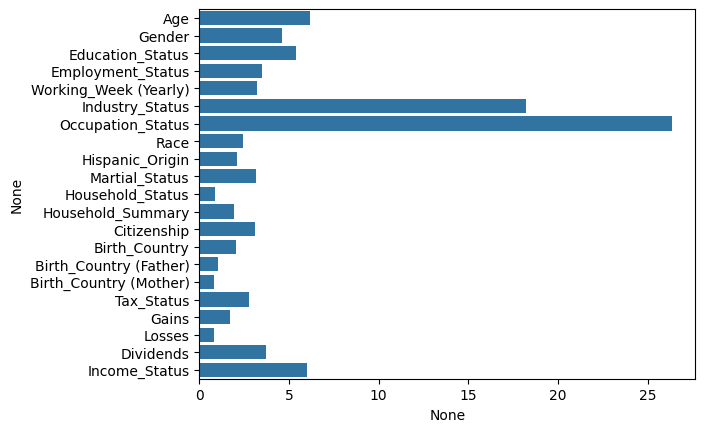

In [ ]:
sns.barplot(x=cat_importances, y= cat_importances.index)
plt.show()

#### 2-1-b. importance가 낮은 라벨을 버려보자 (상위 5개만) -> 폐기

In [ ]:
# cat_importances[cat_importances>5]
# train = pd.read_csv("/content/drive/MyDrive/data_0325/train.csv")
# train.drop('ID',axis=1,inplace=True)
# tmp_train = train[['Age','Education_Status',"Industry_Status","Occupation_Status","Income_Status","Income"]]
# tmp_test = test[['Age','Education_Status',"Industry_Status","Occupation_Status","Income_Status"]]
# tmp_test
# tmp_categorical_features = [
#     'Education_Status',
#     "Industry_Status",
#     "Occupation_Status",
#     "Income_Status"
# ]
# target = tmp_train['Income']
# tmp_train = tmp_train.drop('Income',axis=1)
# x_train, x_valid, y_train,y_valid = train_test_split(tmp_train,target,test_size=0.2,random_state=42)
# train_pool = Pool(data=x_train,label=y_train, cat_features = tmp_categorical_features)
# valid_pool = Pool(data=x_valid,label=y_valid,cat_features = tmp_categorical_features)
# cat = CatBoostRegressor(iterations=1000, learning_rate = 0.1, random_strength = 0.5, depth = 7, random_state = 42)
# cat.fit(train_pool,eval_set=(valid_pool),verbose = 1)
# tmp_test = test[['Age','Education_Status',"Industry_Status","Occupation_Status","Income_Status"]]
# tmp_test
# test_pool = Pool(data = tmp_test, cat_features = tmp_categorical_features)
# test_pred = cat.predict(test_pool)

Age                   6.173754
Education_Status      5.393446
Industry_Status      18.199361
Occupation_Status    26.341090
Income_Status         6.014164
dtype: float64

### 2-2. LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
train,test = encodedData()

In [ ]:
x_train, x_valid, y_train, y_valid = split(train, test)

In [ ]:
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_valid, label=y_valid)

params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

model = lgb.train(params, train_data, num_boost_round=100)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 21
[LightGBM] [Info] Start training from score 556.153500


In [ ]:
test_pred = model.predict(test)

## 3. 제출

In [ ]:
submit = pd.read_csv("/content/drive/MyDrive/data_0325/sample_submission.csv")
submit['Income'] = test_pred
submit.to_csv("/content/drive/MyDrive/data_0325/trial5.csv",index=False)